In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
nfft = 4096
xx = np.fromfile('/home/destevez/CE5/xx.f32', dtype='float32').reshape((-1,nfft))
yy = np.fromfile('/home/destevez/CE5/yy.f32', dtype='float32').reshape((-1,nfft))
xy = np.fromfile('/home/destevez/CE5/xy.c64', dtype='complex64').reshape((-1,nfft))
t = np.arange(xx.shape[0])*585*nfft*8/1.92e6*1e3*np.timedelta64(1, 'ms') + np.datetime64('2020-11-28T10:08:50')

In [3]:
gain_offset = np.average((np.median(xx, axis = 1)/np.median(yy, axis = 1)))
yy *= gain_offset
xy *= np.sqrt(gain_offset)
xy *= np.exp(-1j*np.deg2rad(-160))*(-1j) # correct for X-Y phase offset

In [4]:
signal_peak = np.argmax(xx + yy, axis = 1)
offsets = np.arange(-2,3)
signal_xx = np.zeros(xx.shape[0])
signal_yy = np.zeros(yy.shape[0])
signal_xy = np.zeros(xy.shape[0], dtype = 'complex')
for offset in np.arange(-2,3):
    signal_xx += xx[np.arange(signal_peak.shape[0]), signal_peak + offset]
    signal_yy += yy[np.arange(signal_peak.shape[0]), signal_peak + offset]
    signal_xy += xy[np.arange(signal_peak.shape[0]), signal_peak + offset]
signal_xx /= offsets.size
signal_yy /= offsets.size
signal_xy /= offsets.size
gain_xx_yy = np.median(signal_xx + signal_yy)
signal_xx /= gain_xx_yy
signal_yy /= gain_xx_yy
signal_xy /= gain_xx_yy

In [5]:
I = signal_xx + signal_yy
Q = signal_xx - signal_yy
U = 2*signal_xy.real
V = -2*signal_xy.imag
L = Q + 1j*U
P = np.sqrt(Q**2 + U**2 + V**2)

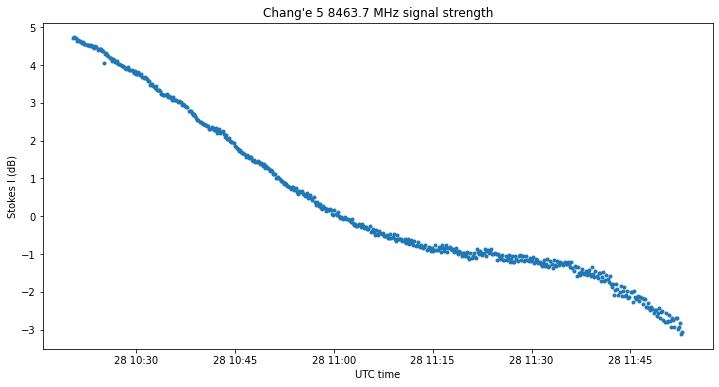

In [6]:
sel = slice(70,None)
plt.figure(figsize = (12, 6))
plt.plot(t[sel], 10*np.log10(I[sel]), '.')
plt.ylabel('Stokes I (dB)')
plt.xlabel('UTC time')
plt.title('Chang\'e 5 8463.7 MHz signal strength');

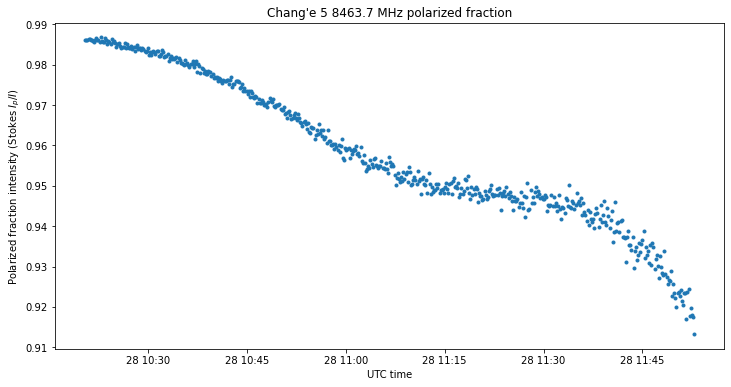

In [7]:
plt.figure(figsize = (12, 6))
plt.plot(t[sel], (P/I)[sel], '.')
plt.xlabel('UTC time')
plt.ylabel('Polarized fraction intensity (Stokes $I_p/I$)')
plt.title('Chang\'e 5 8463.7 MHz polarized fraction');

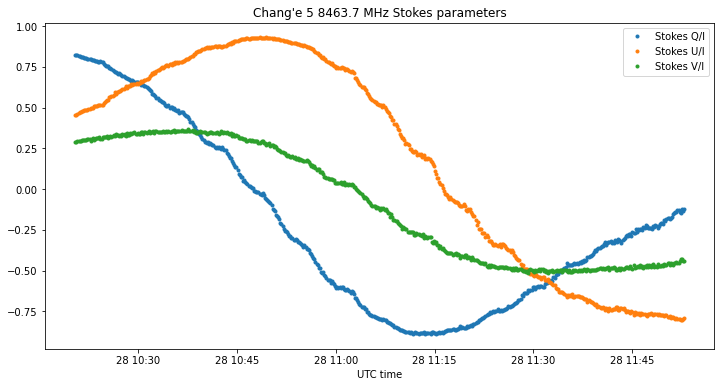

In [8]:
plt.figure(figsize = (12, 6))
plt.plot(t[sel], (Q/I)[sel], '.')
plt.plot(t[sel], (U/I)[sel], '.')
plt.plot(t[sel], (V/I)[sel], '.')
plt.legend(['Stokes Q/I', 'Stokes U/I', 'Stokes V/I'])
plt.xlabel('UTC time')
plt.title('Chang\'e 5 8463.7 MHz Stokes parameters');

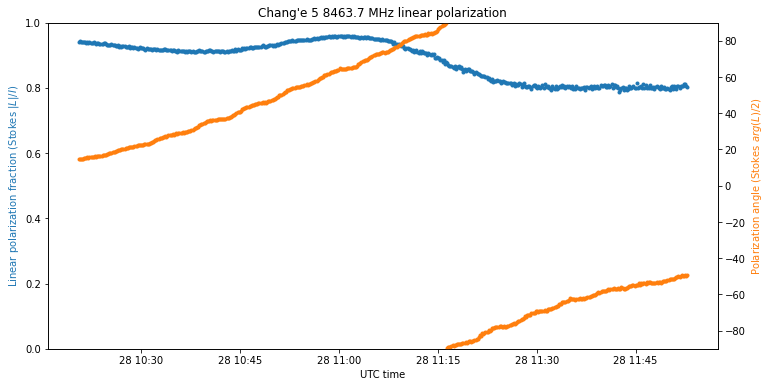

In [9]:
plt.figure(figsize = (12, 6))
plt.plot(t[sel], (np.abs(L)/I)[sel], '.')
plt.ylim((0,1))
plt.xlabel('UTC time')
plt.ylabel('Linear polarization fraction (Stokes $|L|/I$)', color = 'C0')
ax2 = plt.gca().twinx()
plt.plot(t[sel], np.rad2deg(np.angle(L[sel])/2), '.', color = 'C1')
ax2.set_ylabel('Polarization angle (Stokes $arg(L)/2$)', color = 'C1')
ax2.set_ylim((-90,90))
plt.title('Chang\'e 5 8463.7 MHz linear polarization');